In [2]:
import numpy as np
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

# import StemmerFactory class
from nltk.stem import PorterStemmer

# Package merubah kata menjadi kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import seaborn as sns


In [3]:
#membaca isi file
df = pd.read_excel('data.xlsx')

#menampilkan isi file
df.head()


,typetopic,topic,subtopic,channel,id,date,media,name,username,verified,...,views,reachs,impressions,retweets,typedata,permalink,idpost,namepost,usernamepost,textpost
0,topic,Daihatsu,NaN,twitter,1559411414510362624,16/08/2022 12:27:08,NaN,🕷,fvxzvn,0.0,...,0,0,0,0,retweet,https://twitter.com/fvxzvn/status/155941141451...,1558831937594085378,FAIZ ZAINAL,thefaizzainal,Perodua Axia Elektrik? \n\nBateri 32 kWh / Kua...
1,topic,Daihatsu,NaN,twitter,1559411171148845056,16/08/2022 12:26:10,NaN,kucingRumahan,remahanmomogii,0.0,...,0,0,0,0,mention,https://twitter.com/remahanmomogii/status/1559...,NaN,NaN,NaN,NaN
2,topic,Daihatsu,NaN,twitter,1559410096995966977,16/08/2022 12:21:54,NaN,uzone.id,uzoneindonesia,0.0,...,0,0,0,0,post,https://twitter.com/uzoneindonesia/status/1559...,NaN,NaN,NaN,NaN
3,topic,Daihatsu,NaN,twitter,1559407750668779521,16/08/2022 12:12:34,NaN,Ade Fitriyani,yanii2745,0.0,...,0,0,0,0,mention,https://twitter.com/yanii2745/status/155940775...,NaN,NaN,NaN,NaN
4,topic,Daihatsu,NaN,twitter,1559406374106255365,16/08/2022 12:07:06,NaN,Yolan,ryolandafit,0.0,...,0,0,0,0,retweet,https://twitter.com/ryolandafit/status/1559406...,1559394679543975936,CNN Indonesia,CNNIndonesia,Menakar Ayla EV Jadi Mobil Listrik Termurah Ga...


In [4]:
#cek total data
df.shape

(576, 39)

In [5]:
#menampilkan info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 39 columns):
typetopic         576 non-null object
topic             576 non-null object
subtopic          0 non-null float64
channel           576 non-null object
id                576 non-null object
date              576 non-null object
media             143 non-null object
name              576 non-null object
username          315 non-null object
verified          305 non-null float64
user_followers    560 non-null float64
user_friends      297 non-null float64
user_listed       507 non-null float64
user_likes        244 non-null float64
user_posts        568 non-null float64
content           576 non-null object
hashtags          89 non-null object
mentions          169 non-null object
sentiment         576 non-null object
lang              244 non-null object
bot               244 non-null object
gender            100 non-null object
labels            570 non-null object
services         

      channel sentiment  count
0    facebook  negative      1
1    facebook   neutral      4
2    facebook  positive      3
3   instagram   neutral     45
4   instagram  positive     16
5     twitter  negative      2
6     twitter   neutral    208
7     twitter  positive     34
8     youtube  negative      5
9     youtube   neutral    238
10    youtube  positive     20


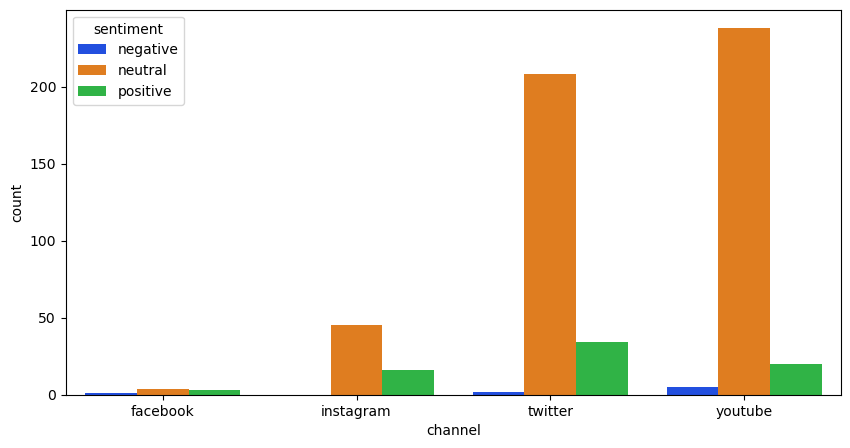

In [6]:

#group by channel and sentiment
channel_sentiment = df.groupby(['channel','sentiment']).size().reset_index(name='count')
print(channel_sentiment)
plt.figure(figsize=(10,5))
sns.barplot(x='channel',y='count',hue='sentiment',data=channel_sentiment, palette='bright')
plt.show()



      channel                                            content  count
0    facebook                                                  -      1
1    facebook  Ayo cobain main di server luar nih bang winrat...      1
2    facebook  Cobain asli SERVER SINGAPURE, jgn salah pilih ...      1
3    facebook  Daihatsu Ayla versi listrik muncul di GIIAS 20...      1
4    facebook  Daihatsu mempekenalkan Rocky hybrid pada ajang...      1
..        ...                                                ...    ...
402   youtube  พับกบ พบกับ Daihatsu Mira ผู้กำกับ ที่มี Mini ...      1
403   youtube                                                 👋😎      1
404   youtube                                                 😅👍      1
405   youtube                                                  😪      1
406   youtube                                                  🤝      1

[407 rows x 3 columns]


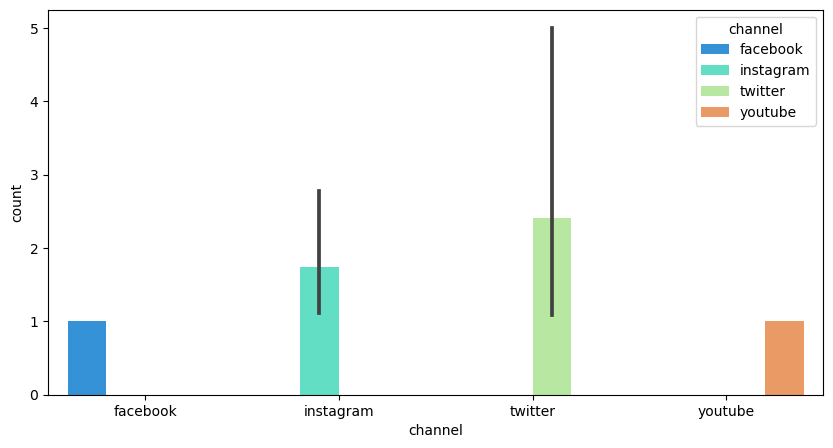

In [7]:
#group by channel and konten

konten = df.groupby(['channel','content']).size().reset_index(name='count')
print(konten)
plt.figure(figsize=(10,5))
sns.barplot(x='channel',y='count',hue='channel',data=konten, palette='rainbow')
plt.show()

     channel  count
0   facebook      8
1  instagram     61
2    twitter    244
3    youtube    263


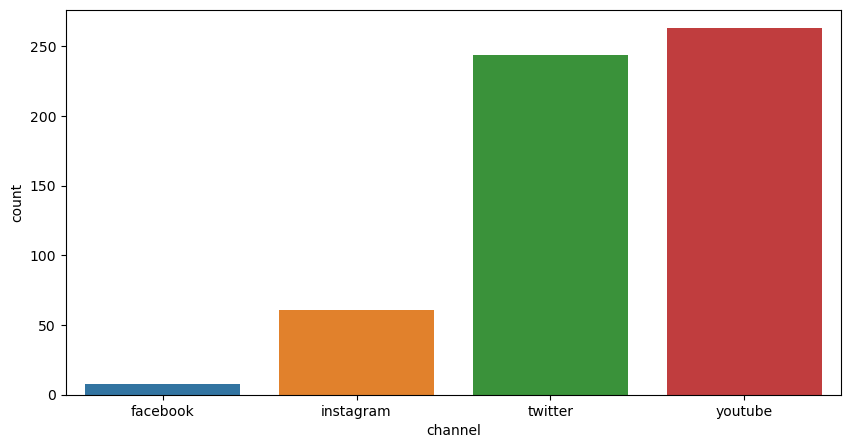

In [8]:
#menampilkan data berdasarkan channel
channel = df.groupby(['channel']).size().reset_index(name='count')
print(channel)

plt.figure(figsize=(10,5))
sns.barplot(x='channel',y='count',data=channel)
plt.show()




      index  count
0   neutral    495
1  positive     73
2  negative      8


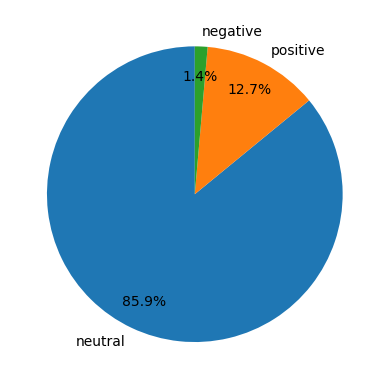

In [9]:
#menampilkan data berdasarkan sentiment

sentiment = df['sentiment'].value_counts().reset_index(name='count')
print(sentiment)

palette_color = sns.color_palette ('bright')
plt.pie(sentiment['count'], labels=sentiment['index'], autopct='%1.1f%%', startangle=90, pctdistance=0.8)
plt.show()


/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128071 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128073 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128175 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3

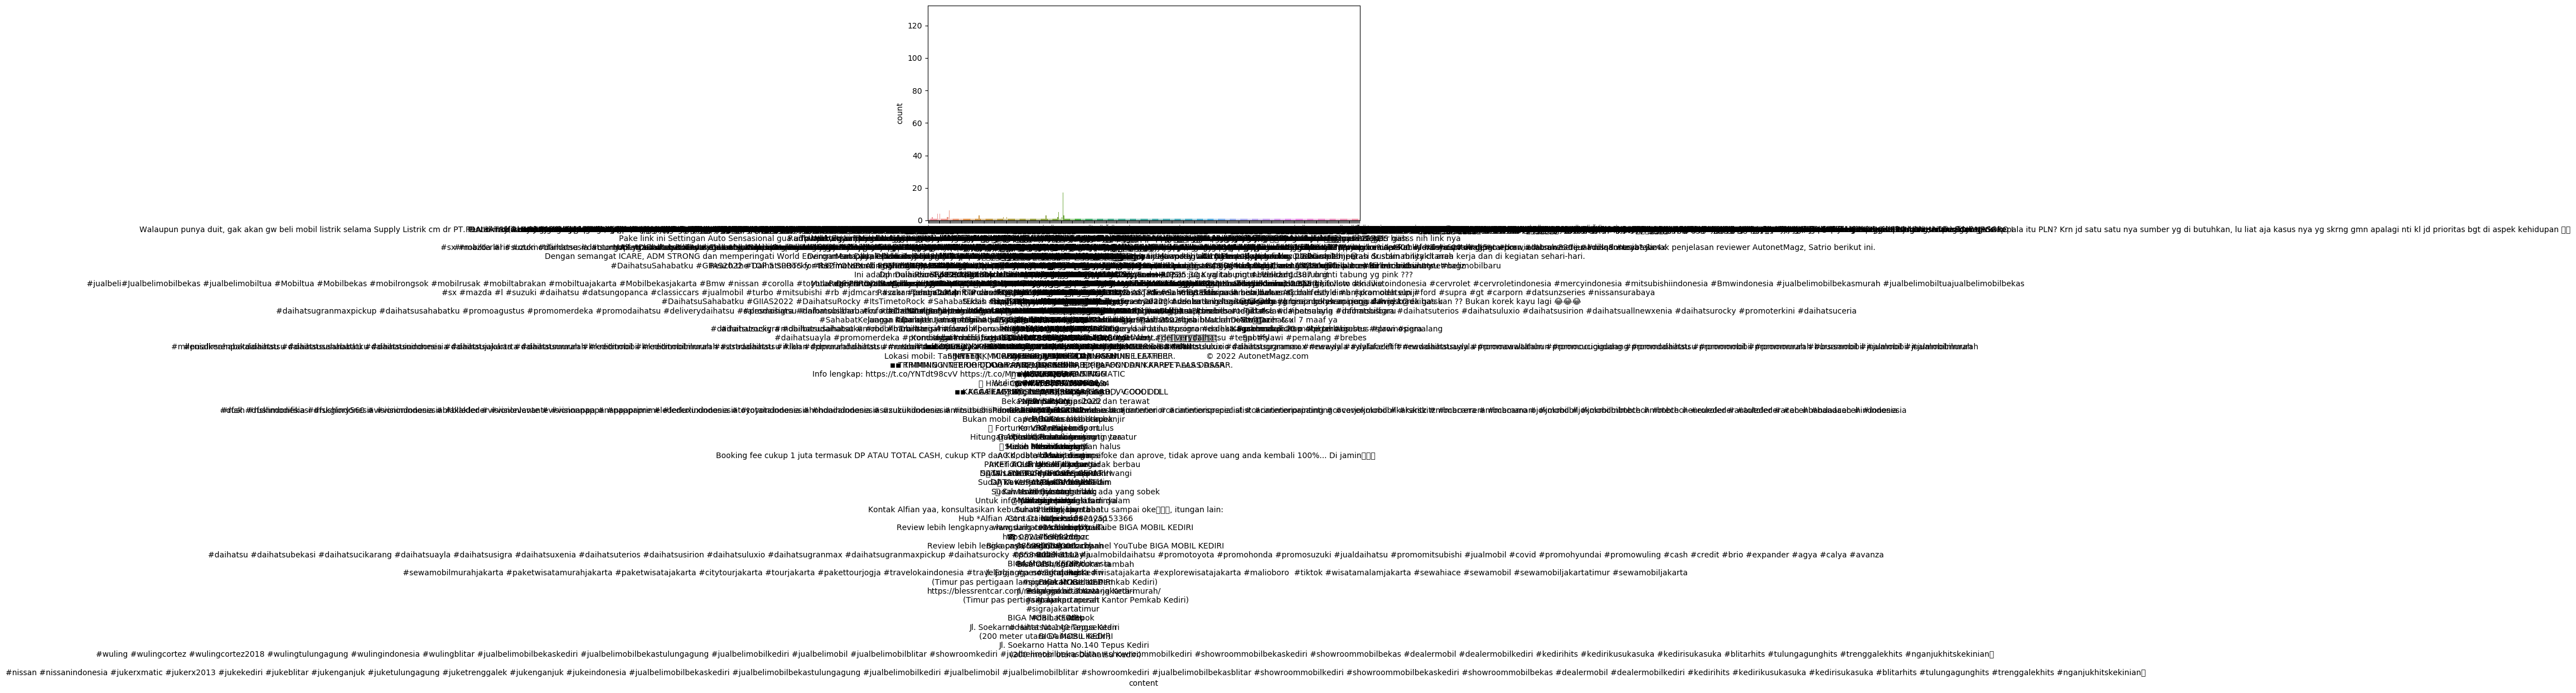